##Importing Modules


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

import seaborn as sns

% matplotlib inline


##Loading Training data

In [43]:
data = pd.read_csv("train.csv")
print(f"Data size : {data.shape}\n")
data.head(6)

Data size : (88858, 10)



,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1


##Getting ID

In [44]:
data['ID_value'] = data['ID'].apply(lambda x: x.strip('F')).astype('int')
data.sample(3)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,ID_value
55318,F00097059,1678,0,1,2,25,25.0,9,2,0,97059
84807,F00148842,1478,0,0,2,15,26.0,13,1,0,148842
14533,F00025525,1297,0,1,2,50,21.0,20,3,1,25525


## Getting an insight into the data

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  ID_value                 88858 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 7.5+ MB


##Nan Pattern

In [46]:
nan_rows = data.loc[data['Number_Weeks_Used'].isna()]
print(f"Shape of nan_rows : {nan_rows.shape}")
nan_rows.head()

Shape of nan_rows : (9000, 11)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,ID_value
5,F00000008,448,0,1,1,0,NaN,0,2,1,8
6,F00000009,448,0,1,1,0,NaN,0,2,1,9
10,F00000021,1212,1,0,1,0,NaN,0,3,0,21
17,F00000037,2401,0,1,1,0,NaN,0,1,1,37
35,F00000076,257,0,0,3,30,NaN,0,2,0,76


In [47]:
data_ = data.dropna(inplace=False)
data_.shape

(79858, 11)

In [48]:
nan_rows['nan_pattern'] = 0
data_['nan_pattern'] = 1
data = pd.concat((nan_rows, data_))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,ID_value,nan_pattern
5,F00000008,448,0,1,1,0,NaN,0,2,1,8,0
6,F00000009,448,0,1,1,0,NaN,0,2,1,9,0
10,F00000021,1212,1,0,1,0,NaN,0,3,0,21,0
17,F00000037,2401,0,1,1,0,NaN,0,1,1,37,0
35,F00000076,257,0,0,3,30,NaN,0,2,0,76,0


#Visualizing our insights

Frequency of datapoints in respective columns

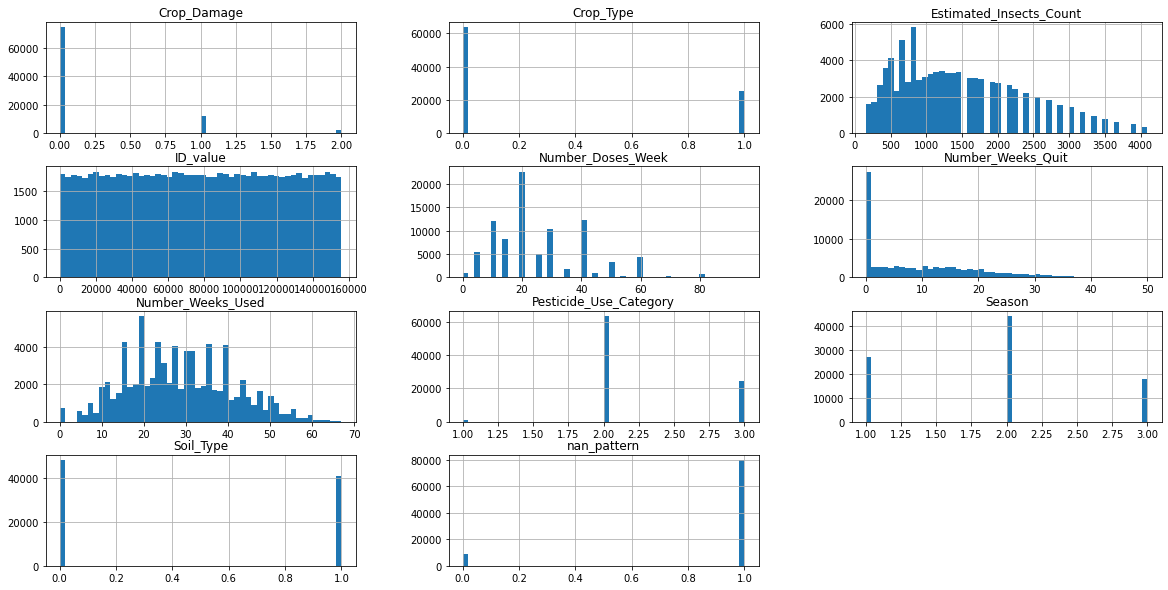

In [49]:
data.hist(bins = 50, figsize = (20,10))
plt.show()

Graphical correlation

In [50]:
data.columns.to_list()

['ID',
 'Estimated_Insects_Count',
 'Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Season',
 'Crop_Damage',
 'ID_value',
 'nan_pattern']

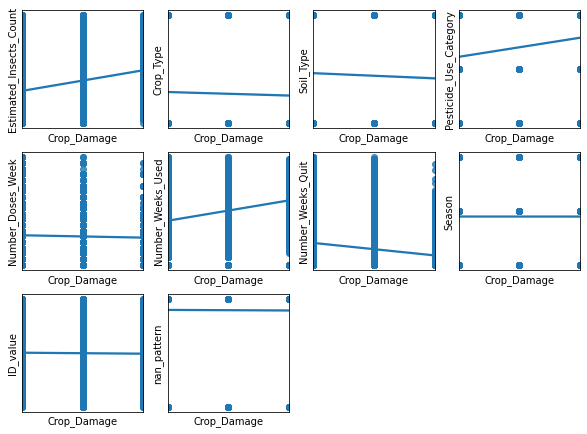

In [51]:
plt.figure(figsize = (10, 10))
x = data['Crop_Damage'].to_list()
cols = data.columns.to_list()[1:]
count = 1
for i in cols:
  if i != 'Crop_Damage':
    y = data[i].values.tolist()
    plt.subplot(4, 4, count)
    count += 1
    sns.regplot(x, y)
    plt.xlabel('Crop_Damage'); plt.ylabel(i)
    plt.xticks([]); plt.yticks([])



Heatmap correlation

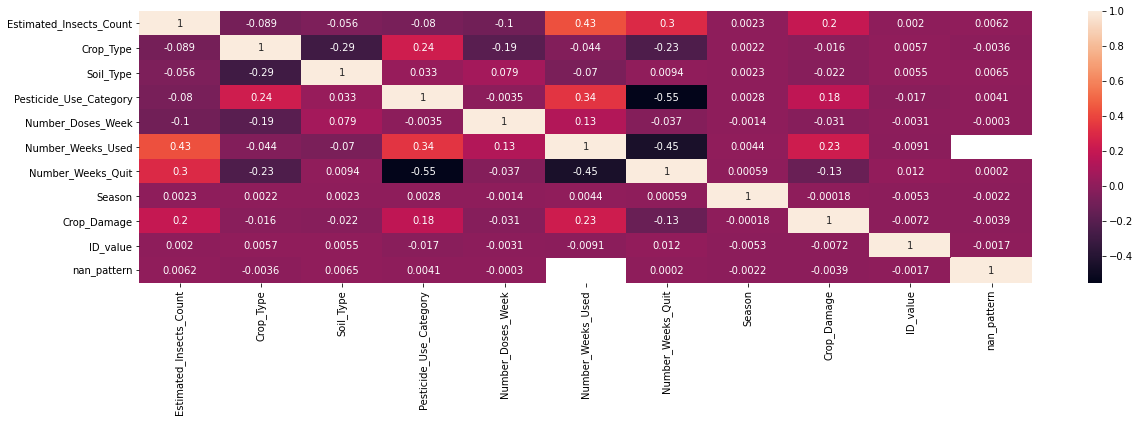

In [52]:
_, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(data.corr(), annot=True, ax = ax)
plt.show()

Unique Values


In [53]:
cols = data.columns.tolist()
for col in cols[1:]:
  size_condition = len(data[col].unique().tolist())
  if (size_condition<5):
    print(f"Unique values in {col} : {data[col].unique().tolist()}")


Unique values in Crop_Type : [0, 1]
Unique values in Soil_Type : [1, 0]
Unique values in Pesticide_Use_Category : [1, 3, 2]
Unique values in Season : [2, 3, 1]
Unique values in Crop_Damage : [1, 0, 2]
Unique values in nan_pattern : [0, 1]


##Features and Labels


In [54]:
data.columns.to_list()

['ID',
 'Estimated_Insects_Count',
 'Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Season',
 'Crop_Damage',
 'ID_value',
 'nan_pattern']

Declaring our labels and features

In [55]:
labels = data.Crop_Damage.values
features = data.drop(['ID', 'Crop_Damage'], axis = 1)
features.head(6)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,ID_value,nan_pattern
5,448,0,1,1,0,NaN,0,2,8,0
6,448,0,1,1,0,NaN,0,2,9,0
10,1212,1,0,1,0,NaN,0,3,21,0
17,2401,0,1,1,0,NaN,0,1,37,0
35,257,0,0,3,30,NaN,0,2,76,0
51,411,0,0,3,30,NaN,0,2,105,0


##Replacing the missing values

In [56]:
# imputer = SimpleImputer(strategy = 'mean')
# features['Number_Weeks_Used'] = imputer.fit_transform(features[["Number_Weeks_Used"]])

features['Number_Weeks_Used'].fillna(-1, inplace = True)
features.head(6)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,ID_value,nan_pattern
5,448,0,1,1,0,-1.0,0,2,8,0
6,448,0,1,1,0,-1.0,0,2,9,0
10,1212,1,0,1,0,-1.0,0,3,21,0
17,2401,0,1,1,0,-1.0,0,1,37,0
35,257,0,0,3,30,-1.0,0,2,76,0
51,411,0,0,3,30,-1.0,0,2,105,0


##Standardizing the missing values

In [57]:
features_scc = StandardScaler()
features = features_scc.fit_transform(features)
features.shape

(88858, 10)

##Splitting our features and labels

In [103]:
x_train, x_val, y_train, y_val = train_test_split(features, labels, random_state = 20, test_size = 0.3)
print(f"Shape of x_train is : {x_train.shape}")
print(f"Shape of y_train is : {y_train.shape}")
print(f"Shape of x_val is : {x_val.shape}")
print(f"Shape of y_val is : {y_val.shape}")

Shape of x_train is : (62200, 10)
Shape of y_train is : (62200,)
Shape of x_val is : (26658, 10)
Shape of y_val is : (26658,)


# Using different Models

## **1. Kernel SVM**

In [87]:
from sklearn.svm import SVC
ksvc = SVC(kernel = "linear", random_state = 0)
ksvc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
ksvc_y_train_pred = ksvc.predict(x_train)
y_val_pred = ksvc.predict(x_val)

print(f"Train accuracy : {accuracy_score(y_train, ksvc_y_train_pred)*100}")
print(f"Validation accuracy : {accuracy_score(y_val, y_val_pred)*100}")

Train accuracy : 83.55627009646302
Validation accuracy : 83.52464550979069


## **2. DTC**

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [93]:
dtc_y_train_pred = dtc.predict(x_train)
y_val_pred = dtc.predict(x_val)

print(f"Train accuracy : {accuracy_score(y_train, dtc_y_train_pred)*100}")
print(f"Validation accuracy : {accuracy_score(y_val, y_val_pred)*100}")

Train accuracy : 100.0
Validation accuracy : 75.49328531772827


## **3. RandomForest approach**

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
rfc_y_train_pred = rfc.predict(x_train)
y_val_pred = rfc.predict(x_val)

print(f"Train accuracy : {accuracy_score(y_train, rfc_y_train_pred)*100}")
print(f"Validation accuracy : {accuracy_score(y_val, y_val_pred)*100}")

Train accuracy : 100.0
Validation accuracy : 83.378347963088


## **4. AdaBoost approach**

In [95]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
adaBoost = AdaBoostClassifier(base_estimator=dtc, n_estimators= 800, learning_rate=0.05)
adaBoost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [96]:
adaboost_y_train_pred = adaBoost.predict(x_train)
adaboost_y_val_pred = adaBoost.predict(x_val)

print(f"Train accuracy : {accuracy_score(y_train, adaboost_y_train_pred)*100}")
print(f"Validation accuracy : {accuracy_score(y_val, adaboost_y_val_pred)*100}")

Train accuracy : 84.40836012861736
Validation accuracy : 84.33115762622853


## **5. XGBoost approach**

In [106]:
xgboost_model = XGBClassifier(max_delta = 3,
                              subsample = 0.8,
                              n_estimators = 400,
                              min_child_weight = 1,
                              random_state= 5,
                              learning_rate = 0.05)

# params = max_delta = 3,
#         subsample = 0.8,
#         n_estimators = 400,
#         min_child_weight = 1,
#         random_state= 5,
#         learning_rate = 0.05

xgboost_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta=3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [108]:
xgboost_y_train_pred = xgboost_model.predict(x_train)
xgboost_y_val_pred = xgboost_model.predict(x_val)

print(f"Train accuracy : {accuracy_score(y_train, xgboost_y_train_pred)*100}")
print(f"Validation accuracy : {accuracy_score(y_val, xgboost_y_val_pred)*100}")

Train accuracy : 84.79421221864952
Validation accuracy : 84.45119663890765


## **6. Neural Network approach**

Importing modules

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [110]:
onehot_labels = to_categorical(labels)
onehot_labels.shape

(88858, 3)

In [111]:
_, _, y_train, y_val = train_test_split(features, onehot_labels, random_state = 20, test_size = 0.3)
print(f"Shape of x_train is : {x_train.shape}")
print(f"Shape of y_train is : {y_train.shape}")
print(f"Shape of x_val is : {x_val.shape}")
print(f"Shape of y_val is : {y_val.shape}")

Shape of x_train is : (62200, 10)
Shape of y_train is : (62200, 3)
Shape of x_val is : (26658, 10)
Shape of y_val is : (26658, 3)


In [112]:
ann = Sequential()
ann.add(Dense(7, input_shape = (x_train.shape)))
ann.add(Activation("relu"))

ann.add(Dense(21))
ann.add(Activation("relu"))
ann.add(Dense(21))
ann.add(Activation("relu"))

ann.add(Dense(3))
ann.add(Activation("softmax"))

ann.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 62200, 7)          77        
_________________________________________________________________
activation (Activation)      (None, 62200, 7)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 62200, 21)         168       
_________________________________________________________________
activation_1 (Activation)    (None, 62200, 21)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 62200, 21)         462       
_________________________________________________________________
activation_2 (Activation)    (None, 62200, 21)         0         
_________________________________________________________________
dense_3 (Dense)              (None, 62200, 3)          6

In [113]:
epochs = 10; 
ann_history = ann.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs = epochs,
                    verbose =1)

Epoch 1/10
1944/1944 [==============================] - 9s 5ms/step - loss: 0.4842 - accuracy: 0.8291 - val_loss: 0.4551 - val_accuracy: 0.8332
Epoch 2/10
1944/1944 [==============================] - 9s 5ms/step - loss: 0.4430 - accuracy: 0.8386 - val_loss: 0.4439 - val_accuracy: 0.8397
Epoch 3/10
1944/1944 [==============================] - 9s 5ms/step - loss: 0.4379 - accuracy: 0.8400 - val_loss: 0.4414 - val_accuracy: 0.8397
Epoch 4/10
1944/1944 [==============================] - 9s 5ms/step - loss: 0.4366 - accuracy: 0.8405 - val_loss: 0.4421 - val_accuracy: 0.8407
Epoch 5/10
1944/1944 [==============================] - 9s 5ms/step - loss: 0.4350 - accuracy: 0.8404 - val_loss: 0.4408 - val_accuracy: 0.8396
Epoch 6/10
1944/1944 [==============================] - 10s 5ms/step - loss: 0.4340 - accuracy: 0.8406 - val_loss: 0.4373 - val_accuracy: 0.8402
Epoch 7/10
1944/1944 [==============================] - 9s 5ms/step - loss: 0.4332 - accuracy: 0.8407 - val_loss: 0.4367 - val_accuracy

plotting loss and accuracy curves

In [114]:
epochs_ = [d for d in range(1, epochs+1)]
loss = ann_history.history['loss']
val_loss = ann_history.history['val_loss']
acc = ann_history.history['accuracy']
val_acc = ann_history.history['val_accuracy']

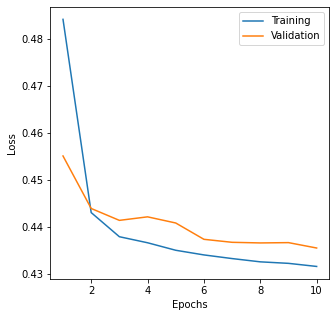

In [116]:
plt.figure(figsize=(5, 5))
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.plot(epochs_, loss, label = 'Training')
plt.plot(epochs_, val_loss, label = 'Validation' )
plt.legend()
plt.show()

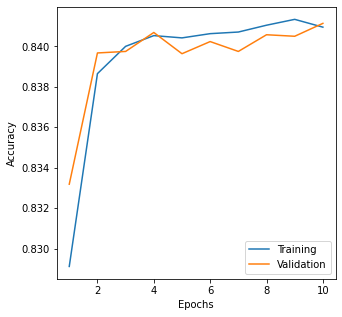

In [117]:
plt.figure(figsize=(5, 5))
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.plot(epochs_, acc, label = 'Training')
plt.plot(epochs_, val_acc, label = 'Validation' )
plt.legend()
plt.show()

##Testing

In [118]:
test_data = pd.read_csv("test.csv")
test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [119]:
test_data['ID_value'] = test_data['ID'].apply(lambda x: x.strip('F')).astype('int')
test_data.sample(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,ID_value
39604,F00104166,915,0,0,2,40,24.0,15,2,104166
33419,F00087922,1132,0,1,2,10,31.0,15,2,87922
38704,F00101885,3164,0,1,2,15,NaN,30,3,101885
5538,F00014398,1296,1,0,3,20,36.0,0,2,14398
816,F00002108,2138,0,0,2,20,38.0,13,1,2108


In [120]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
 9   ID_value                 59310 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 4.5+ MB


In [121]:
nan_test_rows = test_data.loc[test_data['Number_Weeks_Used'].isna()]
test_data_ = test_data.dropna(inplace=False)
nan_test_rows['nan_pattern'] = 0
test_data_['nan_pattern'] = 1
test_data = pd.concat((nan_test_rows, test_data_))
test_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,ID_value,nan_pattern
0,F00000002,188,1,1,1,0,NaN,0,2,2,0
6,F00000016,851,1,0,1,0,NaN,0,3,16,0
11,F00000031,1898,0,1,1,0,NaN,0,2,31,0
21,F00000047,3336,0,1,1,0,NaN,0,2,47,0
39,F00000094,375,0,0,3,30,NaN,0,1,94,0


In [122]:
test_data['Number_Weeks_Used'].fillna(-1, inplace = True)
test_data.head(6)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,ID_value,nan_pattern
0,F00000002,188,1,1,1,0,-1.0,0,2,2,0
6,F00000016,851,1,0,1,0,-1.0,0,3,16,0
11,F00000031,1898,0,1,1,0,-1.0,0,2,31,0
21,F00000047,3336,0,1,1,0,-1.0,0,2,47,0
39,F00000094,375,0,0,3,30,-1.0,0,1,94,0
57,F00000138,489,0,0,3,60,-1.0,0,3,138,0


In [126]:
test_features = test_data.drop(['ID'], axis = 1)
test_features.shape

(59310, 10)

In [127]:
test_features = features_scc.transform(test_features)
test_features.shape

(59310, 10)

Using XGBOOST because it has the highest accuracy among all other models

In [128]:
test_preds = xgboost_model.predict(test_features)
test_preds

array([1, 1, 1, ..., 0, 0, 0])

In [129]:
test_data["Crop_Damage"] = test_preds
test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,ID_value,nan_pattern,Crop_Damage
0,F00000002,188,1,1,1,0,-1.0,0,2,2,0,1
6,F00000016,851,1,0,1,0,-1.0,0,3,16,0,1
11,F00000031,1898,0,1,1,0,-1.0,0,2,31,0,1
21,F00000047,3336,0,1,1,0,-1.0,0,2,47,0,1
39,F00000094,375,0,0,3,30,-1.0,0,1,94,0,0


In [131]:
result = test_data[["ID", "Crop_Damage"]]
result.head()

,ID,Crop_Damage
0,F00000002,1
6,F00000016,1
11,F00000031,1
21,F00000047,1
39,F00000094,0


In [132]:
result.to_csv("ML4e_task_result.csv")